In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:


from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.datasets import make_blobs


def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = np.where(labels == k)[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

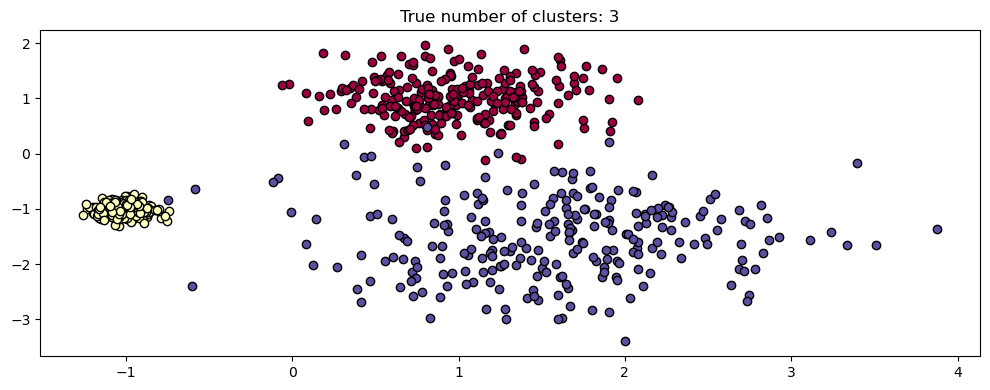

In [6]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12920\3629672893.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_12920\3629672893.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


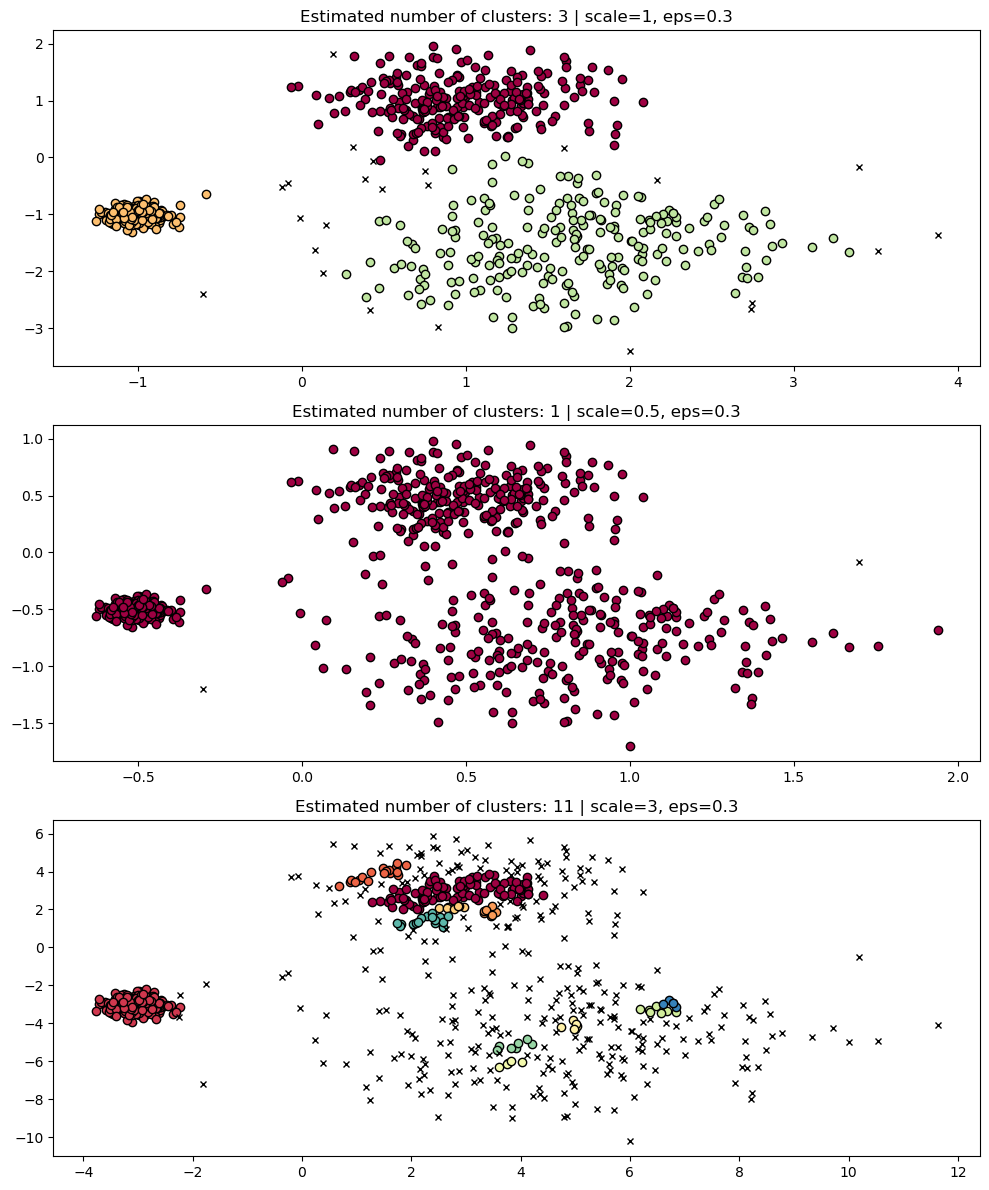

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

In [8]:
 from sklearn.cluster import HDBSCAN
from sklearn.datasets import load_digits

In [9]:
hdb = HDBSCAN(min_cluster_size=20)
label=hdb.fit(X)

In [10]:
supervised=pd.DataFrame(dataset)

In [11]:
supervised['cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,HDBSCAN(min_cluster_size=20)
1,2,Male,21,15,81,HDBSCAN(min_cluster_size=20)
2,3,Female,20,16,6,HDBSCAN(min_cluster_size=20)
3,4,Female,23,16,77,HDBSCAN(min_cluster_size=20)
4,5,Female,31,17,40,HDBSCAN(min_cluster_size=20)
...,...,...,...,...,...,...
195,196,Female,35,120,79,HDBSCAN(min_cluster_size=20)
196,197,Female,45,126,28,HDBSCAN(min_cluster_size=20)
197,198,Male,32,126,74,HDBSCAN(min_cluster_size=20)
198,199,Male,32,137,18,HDBSCAN(min_cluster_size=20)


In [12]:
supervised.to_csv('cluster_group' ,index=False)

In [13]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,HDBSCAN(min_cluster_size=20)
1,2,Male,21,15,81,HDBSCAN(min_cluster_size=20)
2,3,Female,20,16,6,HDBSCAN(min_cluster_size=20)
3,4,Female,23,16,77,HDBSCAN(min_cluster_size=20)
4,5,Female,31,17,40,HDBSCAN(min_cluster_size=20)
...,...,...,...,...,...,...
195,196,Female,35,120,79,HDBSCAN(min_cluster_size=20)
196,197,Female,45,126,28,HDBSCAN(min_cluster_size=20)
197,198,Male,32,126,74,HDBSCAN(min_cluster_size=20)
198,199,Male,32,137,18,HDBSCAN(min_cluster_size=20)


In [14]:
#!pip install seaborn

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


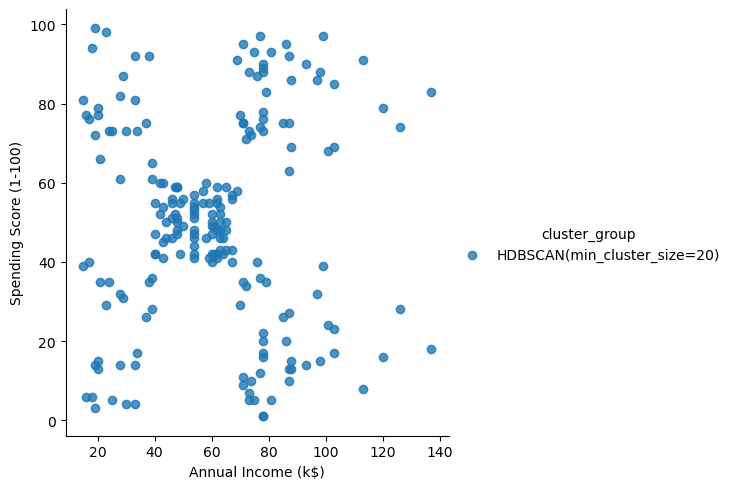

In [15]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)